## 3. Calidad de un vino

In [162]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import sparse_categorical_crossentropy

### (a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [90]:
df_red = pd.read_csv("dataset3/winequality-red.csv",sep=";")
df_red['type'] = 0
df_white = pd.read_csv("dataset3/winequality-white.csv",sep=";")
df_white['type'] = 1
df = pd.concat([df_red,df_white], axis=0)
df.info()
pd.value_counts(df['quality'].values, sort=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


4     216
8     193
5    2138
9       5
6    2836
3      30
7    1079
dtype: int64

#### Observación
Se agragó la columna "type" donde 0 es tinto y 1 es blanco. Se observa que el dataset no contiene valores de calidad menores que 3 y que la mayoría se ubica entre 5 y 7. Además existe una gran diferencia entre una categoría y otra, pudiendo afectar el proceso de aprendizaje.

### (b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas (25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

0    2384
1    4113
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
type                    6497 non-null int64
good_quality            6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


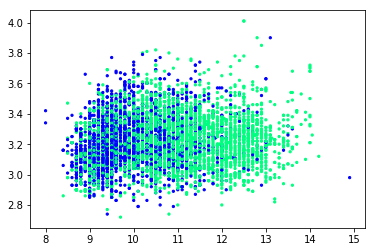

In [91]:
#Create sets
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
df_no_quality = df.drop('quality',1)
print(pd.value_counts(df_no_quality['good_quality'].values, sort=False))
print(df_no_quality.info())
y = df_no_quality.pop('good_quality')
X = df_no_quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Plot ph vs alcohol
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train,y_test),axis=0)
plt.scatter(X[:,10], X[:,8], s=5, c=y, cmap=plt.cm.winter)
plt.show()

#### Observación
Cabe destacar la diferencia existente entre la categoría "buena calidad", 1, y mala calidad, 0. Lo cual puede afectar posteriormente la calidad de la máquina. Se investigaron los atributos del vino aprendiendo que gran parte de la calidad depende del ph y de la cantidad de alcohol. A modo de análisis previo y comprobación de esto, se graficó la dependencia del ph con el nivel de alcohol, dando cuenta que este par de atributos separa de mejor forma las clases.

### (c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera. Recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas, debido al desbalanceo que se produce en las dos clases mida la métrica F1-score [5] sobre el conjunto de entrenamiento y de pruebas.

In [92]:
# Función que escoge parámetros óptimos

#rs=20
#md=20
#mss=20
#df1=0
#
#for i in range(1, rs):
#    for j in range(1, md):
#        for k in range(2, mss):
#            tree_c = Tree(criterion = "entropy", random_state = i, max_depth=j, min_samples_split=k)
#            tree_c.fit(X_train, y_train)
#            f1 = f1_score(y_train, tree_c.predict(X_train))
#            if (f1>df1):
#                df1 = f1
#                print("Entropy %d %d %d %f" % (i, j, k, df1))
#            tree_c = Tree(criterion = "gini", random_state = i, max_depth=j, min_samples_split=k)
#            tree_c.fit(X_train, y_train)
#            f1 = f1_score(y_train, tree_c.predict(X_train))
#            if (f1>df1):
#                df1 = f1
#                print("Gini %d %d %d %f" % (i, j, k, df1))

In [93]:
tree_c = Tree(criterion = "entropy", random_state = 9, max_depth=18, min_samples_split=2)
tree_c.fit(X_train, y_train)
print(classification_report(y_train, tree_c.predict(X_train)))

tree_c = Tree(criterion = "entropy", random_state = 9, max_depth=18, min_samples_split=2)
tree_c.fit(X_train, y_train)
print(classification_report(y_test, tree_c.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1800
          1       1.00      0.99      1.00      3072

avg / total       0.99      0.99      0.99      4872

             precision    recall  f1-score   support

          0       0.68      0.68      0.68       584
          1       0.82      0.82      0.82      1041

avg / total       0.77      0.77      0.77      1625



#### Respuesta

Se realizó una función que escogió los mejores parámetros basado en el f1Score del conjunto de entrenamiento. A partir de el se llegó a que la profundidad debía ser 18 y que el número mínimo de elementos por corte debía ser 2. Una vez hecho esto, se obtuvo un reporte de clasificación para el conjunto de entrenamiento y el de pruebas.

Se observa que dada la cantidad menor de ejemplos para la clase 0 (baja calidad), su f1Score es menor, mientras que para la clase 1 (alta calidad) esta estadística es mejor. Esto se debe a que hay una mayor cantidad de ejemplos en ese caso.



### (d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [94]:
# Función que escoge parámetros óptimos

#score = 0
#for rs in range(1,20):
#    for md in range(1,20):
#        for ne in range(1,100):
#            model = RandomForestClassifier(n_estimators=ne, random_state=rs, max_depth=md, n_jobs=-1)
#            model.fit(X_train, y_train)
#            s = f1_score(y_train, model.predict(X_train))
#            if (s>score):
#                score = s
#                print("RF %d %d %d %f" % (rs, md, ne, score))

In [95]:
scoreTrain = []
scoreTest = []
for ne in range(1,100):
    model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=70, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, md, sTrain))

RF 1 20 0.918504
RF 2 20 0.911816
RF 3 20 0.964447
RF 4 20 0.967463
RF 5 20 0.980608
RF 6 20 0.982778
RF 7 20 0.987827
RF 8 20 0.989377
RF 9 20 0.991561
RF 10 20 0.992665
RF 11 20 0.993018
RF 12 20 0.994626
RF 13 20 0.995288
RF 14 20 0.995767
RF 15 20 0.997075
RF 16 20 0.996745
RF 17 20 0.997074
RF 18 20 0.997721
RF 19 20 0.997887
RF 20 20 0.998535
RF 21 20 0.998536
RF 22 20 0.998698
RF 23 20 0.998861
RF 24 20 0.999024
RF 25 20 0.998861
RF 26 20 0.999186
RF 27 20 0.999186
RF 28 20 0.999512
RF 29 20 0.999512
RF 30 20 0.999512
RF 31 20 0.999512
RF 32 20 0.999674
RF 33 20 0.999674
RF 34 20 0.999674
RF 35 20 0.999674
RF 36 20 0.999674
RF 37 20 0.999837
RF 38 20 0.999837
RF 39 20 0.999837
RF 40 20 0.999674
RF 41 20 1.000000
RF 42 20 0.999674
RF 43 20 0.999674
RF 44 20 0.999674
RF 45 20 0.999837
RF 46 20 0.999837
RF 47 20 0.999837
RF 48 20 0.999837
RF 49 20 1.000000
RF 50 20 1.000000
RF 51 20 1.000000
RF 52 20 1.000000
RF 53 20 1.000000
RF 54 20 1.000000
RF 55 20 1.000000
RF 56 20 1.000000
R

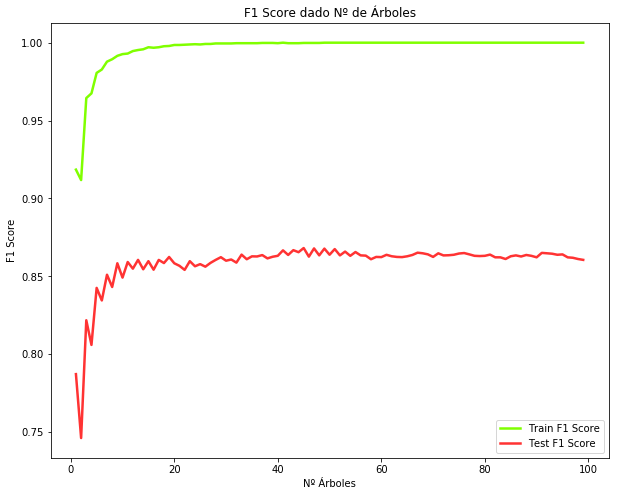

In [96]:
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

### (e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

AB 1 0.835378
AB 2 0.848475
AB 3 0.859063
AB 4 0.871408
AB 5 0.876673
AB 6 0.884044
AB 7 0.892828
AB 8 0.903558
AB 9 0.910201
AB 10 0.916371
AB 11 0.920148
AB 12 0.946090
AB 13 0.929147
AB 14 0.938272
AB 15 0.943758
AB 16 0.949708
AB 17 0.953277
AB 18 0.977166
AB 19 0.966299
AB 20 0.968045
AB 21 0.970631
AB 22 0.973034
AB 23 0.975958
AB 24 0.980985
AB 25 0.984885
AB 26 0.996098
AB 27 0.993496
AB 28 0.997071
AB 29 0.998049
AB 30 0.998046
AB 31 0.998698
AB 32 0.999187
AB 33 0.999349
AB 34 1.000000
AB 35 0.999512
AB 36 0.999837
AB 37 0.999837
AB 38 1.000000
AB 39 1.000000
AB 40 1.000000
AB 41 1.000000
AB 42 1.000000
AB 43 1.000000
AB 44 1.000000
AB 45 1.000000
AB 46 1.000000
AB 47 1.000000
AB 48 1.000000
AB 49 1.000000


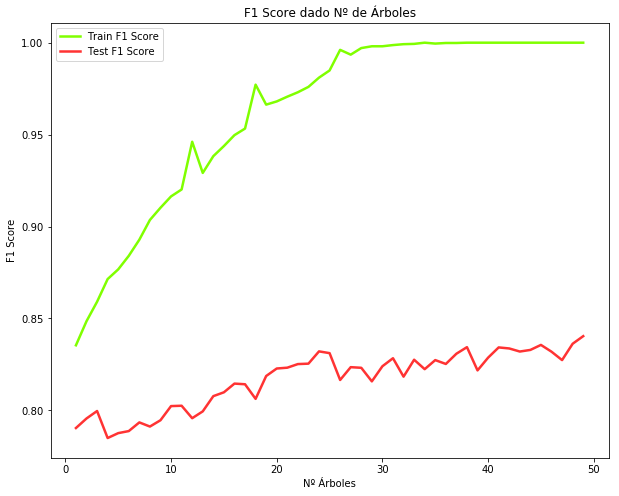

In [97]:
scoreTrain = []
scoreTest = []
for ne in range(1,50):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=6), n_estimators=ne)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("AB %d %f" % (ne, sTrain))

plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,50)), np.array(scoreTrain), lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(np.array(range(1,50)), np.array(scoreTest), lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

### (f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).

In [163]:
df_f = df

annModel = Sequential()
annModel.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
annModel.add(Dense(units=1, activation='softmax'))
annModel.compile(loss=sparse_categorical_crossentropy,optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
annModel.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5


KeyError: '[2811  631 1176 4141 2297 3907 2119 3617 4445  935 3721 1479 3842 1142 2099\n 1719 3190  546 3905 2088 2747  291 3154 2955 4487 3614  306 1373 1858 1196\n  683 2545] not in index'

In [135]:
y_train.shape

(4872,)

### (g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random Forest, impleméntelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es AdaBoost ?